# Train e Test del dataset Appointment 

## Import delle librerie

In [1]:
!pip install --user -r requirements.txt

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sl
import seaborn as sns
import datetime as dt

from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

## Caricamento dei dataset

Eseguiamo il caricamento dei dataset che verranno utilizzati per l'addestramento e per il test del modello.

In [3]:
url_train = 'train.csv'
url_test = 'test.csv'

train_data = pd.read_csv(url_train)
test_data = pd.read_csv(url_test)

In [4]:
# Stampa delle prime 10 righe del dataset di train
train_data.head(50)

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,No,4.833833e+13,5596102,F,2016-04-18T13:56:52Z,2016-05-13T00:00:00Z,54,ITARARÉ,0,0,0,0,0,0
1,Yes,9.963767e+10,5674430,M,2016-05-09T11:03:40Z,2016-05-16T00:00:00Z,46,JABOUR,0,0,0,0,0,0
2,No,2.225661e+14,5579701,M,2016-04-13T15:26:41Z,2016-05-03T00:00:00Z,62,JARDIM DA PENHA,0,0,0,0,0,1
3,No,4.163143e+10,5643240,M,2016-05-02T07:16:31Z,2016-05-02T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,0
4,No,3.366512e+12,5628612,F,2016-04-27T11:18:56Z,2016-04-29T00:00:00Z,26,JUCUTUQUARA,0,0,0,0,0,0
5,No,9.654886e+12,5667983,F,2016-05-06T08:20:58Z,2016-05-18T00:00:00Z,15,ILHA DAS CAIEIRAS,0,0,0,0,0,0
6,No,9.853677e+13,5683176,M,2016-05-11T07:18:32Z,2016-05-11T00:00:00Z,94,TABUAZEIRO,0,1,0,0,0,0
7,No,5.622948e+14,5642399,M,2016-04-29T15:47:50Z,2016-05-03T00:00:00Z,16,CONSOLAÇÃO,0,0,0,0,0,0
8,No,4.348428e+11,5668789,M,2016-05-06T09:44:10Z,2016-05-06T00:00:00Z,5,CENTRO,0,0,0,0,0,0
9,No,9.281785e+11,5543959,F,2016-04-05T10:49:39Z,2016-04-29T00:00:00Z,57,JARDIM DA PENHA,0,0,0,0,0,1


## Analisi del dataset

Ora è il momento di analizzare il dataset.

In [5]:
# Numero di righe e colonne nel dataset
print(f"Shape: {train_data.shape}")
print(f"Numero di righe (utenti telefonici): {train_data.shape[0]}")
print(f"Numero di colonne: {train_data.shape[1]}")

Shape: (70736, 14)
Numero di righe (utenti telefonici): 70736
Numero di colonne: 14


Osserviamo il tipo di ogni colonna presente nel dataset.

In [6]:
train_data.dtypes

No-show            object
PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
dtype: object

Spieghiamo il significato di ogni colonna del dataset:

**PatientId**
    Identificazione di un paziente

**AppointmentID**
    Identificazione di ogni appuntamento

**Gender**
    Maschio o femmina.

**AppointmentDay**
    Il giorno dell'appuntamento effettivo, quando devono visitare il medico.

**ScheduledDay**
    Il giorno in cui qualcuno ha chiamato o registrato l'appuntamento, ovviamente prima dell'appuntamento.

**Age**
    Quanti anni ha il paziente.

**Neighbourhood**
    Dove si svolge l'appuntamento.

**Scholarship**
    È una sorta di assicurazione familiare per la salute

**Hipertension, Diabetes, Alcoholism, Handcap**
   Sì/No

**SMS_received**
    1 o più messaggi inviati al paziente.

Vediamo i valori che sono contenuti dentro ogni colonna.

In [7]:
# Stampa del conto dei valori presenti in ogni colonna
for val in train_data:
    print(train_data[val].value_counts())
    print()

No     56403
Yes    14333
Name: No-show, dtype: int64

8.221459e+14    62
9.963767e+10    58
2.688613e+13    52
3.353478e+13    44
8.713749e+14    42
                ..
8.538898e+11     1
1.996873e+12     1
5.595418e+13     1
8.395176e+11     1
5.868530e+13     1
Name: PatientId, Length: 46514, dtype: int64

5638143    1
5665435    1
5646992    1
5644945    1
5651090    1
          ..
5668133    1
5666084    1
5655843    1
5659937    1
5771266    1
Name: AppointmentID, Length: 70736, dtype: int64

F    45869
M    24867
Name: Gender, dtype: int64

2016-05-06T07:09:54Z    16
2016-04-25T17:17:46Z    15
2016-05-06T07:09:53Z    15
2016-04-25T17:17:23Z    13
2016-04-25T17:18:27Z    13
                        ..
2016-05-20T13:41:54Z     1
2016-05-06T08:05:51Z     1
2016-03-14T09:28:39Z     1
2016-06-02T18:48:54Z     1
2016-06-06T13:04:24Z     1
Name: ScheduledDay, Length: 67709, dtype: int64

2016-06-06T00:00:00Z    2989
2016-05-16T00:00:00Z    2931
2016-05-30T00:00:00Z    2921
2016-06-08T00:

Stampiamo i valori **unici** contenuti in ogni colonna:

In [8]:
# Stampa di tutti i valori unici di ogni colonna
for val in train_data:
    print(val, ': ', np.sort(train_data[val].unique()))
    print()

No-show :  ['No' 'Yes']

PatientId :  [4.37417565e+04 9.37795293e+04 1.41724167e+05 ... 9.99946537e+14
 9.99968578e+14 9.99981632e+14]

AppointmentID :  [5030230 5122866 5134197 ... 5790464 5790466 5790481]

Gender :  ['F' 'M']

ScheduledDay :  ['2015-11-10T07:13:56Z' '2015-12-03T08:17:28Z' '2015-12-07T10:40:59Z' ...
 '2016-06-08T19:32:56Z' '2016-06-08T19:33:23Z' '2016-06-08T19:58:52Z']

AppointmentDay :  ['2016-04-29T00:00:00Z' '2016-05-02T00:00:00Z' '2016-05-03T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-05T00:00:00Z' '2016-05-06T00:00:00Z'
 '2016-05-09T00:00:00Z' '2016-05-10T00:00:00Z' '2016-05-11T00:00:00Z'
 '2016-05-12T00:00:00Z' '2016-05-13T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-05-16T00:00:00Z' '2016-05-17T00:00:00Z' '2016-05-18T00:00:00Z'
 '2016-05-19T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-24T00:00:00Z'
 '2016-05-25T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-06-01T00:00:00Z' '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z'
 '2016-06-06T00:00:00Z' '2016-0

### Rimozione delle righe con valori nulli

Procediamo ora con il ceracre se ci sono righe nulle sia sul dataset di train che su quello di test. Tali righe saranno considerate non valide e dovranno, pertanto, essere rimosse dal dataset per evitare possibili errori durante l'addestramento.

In [9]:
# Sostituisco ad ogni stringa vuola il valore 'NaN' nel dataset di train
train_data.replace("", np.nan, inplace=True)
train_data.replace(" ", np.nan, inplace=True)
train_data.replace("?", np.nan, inplace=True)
train_data.replace("nan", np.nan, inplace=True)
train_data.replace("na", np.nan, inplace=True)
train_data.replace("NaN", np.nan, inplace=True)

# Sostituisco ad ogni stringa vuola il valore 'NaN' nel dataset di test
test_data.replace("", np.nan, inplace=True)
test_data.replace(" ", np.nan, inplace=True)
test_data.replace("?", np.nan, inplace=True)
test_data.replace("nan", np.nan, inplace=True)
test_data.replace("na", np.nan, inplace=True)
test_data.replace("NaN", np.nan, inplace=True)

In [10]:
# Controllo dei dati non validi (NaN) nel dataset di train
train_data.isna().sum()

No-show           0
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
dtype: int64

In [11]:
# Controllo dei dati non validi (NaN) nel dataset di test
test_data.isna().sum()

No-show           0
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
dtype: int64

Rimozione delle righe con valori nulli.

In [12]:
# Procediamo con l'eliminazione dei dati non validi (NaN)
test_data.dropna(inplace=True)
train_data.dropna(inplace=True)

Controlliamo nuovamente se sono state eliminate tutte le righe con valori nulli.

In [13]:
# Controllo dei dati non validi (NaN) nel dataset di train
train_data.isna().sum()

No-show           0
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
dtype: int64

In [14]:
# Controllo dei dati non validi (NaN) nel dataset di test
test_data.isna().sum()

No-show           0
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
dtype: int64

## Statistiche sul dataset

Vediamo ora un po' di statistiche dei valori contenuti nel dataset.

In [15]:
# Statistiche del dataset
train_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,7.073600e+04,7.073600e+04,70736.000000,70736.000000,70736.000000,70736.000000,70736.000000,70736.000000,70736.000000
mean,1.487782e+14,5.675410e+06,37.094549,0.099723,0.198272,0.072057,0.030847,0.022803,0.320869
std,2.575217e+14,7.139071e+04,23.115216,0.299632,0.398701,0.258584,0.172905,0.163643,0.466814
min,4.374176e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.168386e+12,5.640516e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.195643e+13,5.680748e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.472032e+13,5.725806e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790481e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Osserviamo le quantità di persone che si sono presentate alla visita.

In [16]:
# Numero delle persone che non si sono presentate alla visita (No-show)
# No: si sono presentati
# Yes: non si sono presentati
train_data['No-show'].value_counts()

No     56403
Yes    14333
Name: No-show, dtype: int64

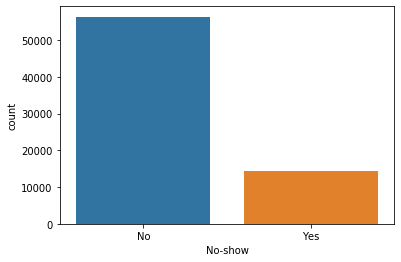

In [17]:
# Diagramma che confronta le persone che hanno lasciato la compagnia telefonica
sns.countplot(train_data['No-show'])

Ora invece mettiamo in relazione le features del dataset con la quantità di gente che non si è presentata alla visita prenotata.

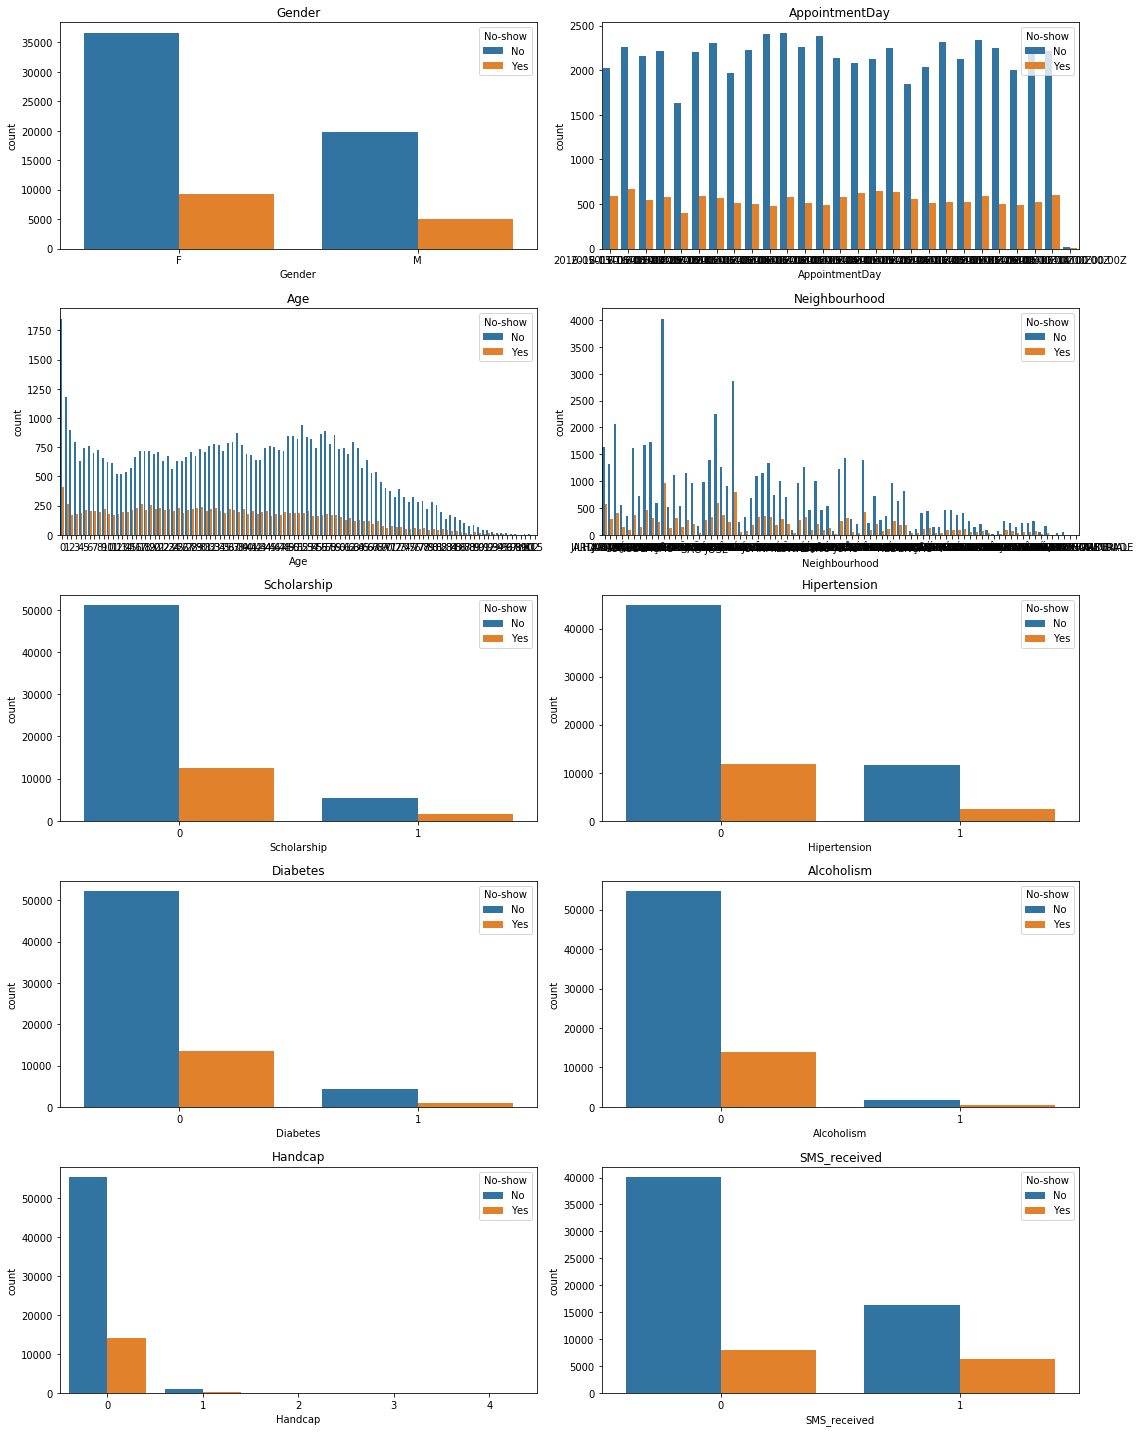

In [18]:
# Alcuni grafici che mettono in relazione le features
# del dataset con le persone che non si sono presentati alla visita

cols = ['Gender', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

n_rows = 5
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*4))
i=0
for r in range(n_rows):
    for c in range(n_cols):
        ax = axs[r][c]
        sns.countplot(train_data[cols[i]], hue=train_data['No-show'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='No-show', loc='upper right')
        i+=1
    
plt.tight_layout()

## Modifica di alcune colonne

Una delle prime cose che abbiamo potuto osservare fino ad ora è come le date vengano gestite come degli oggetti. Invece di considerare ```ScheduledDay``` e ```AppointmentDay ``` come due date separate possiamo aggregarle prendendone la differenza. Aggiungiamo, inoltre, anche una nuova colonna che contiene il giorno della settimana in cui è previsto l'appuntamento.

In [19]:
# Funzione che restituisce una lista contenete la differenza
# tra le date di appuntamento e le date di quando l'appuntamento
# è stato preso.
def make_timedelta(data):
    app_day = pd.to_datetime(data['AppointmentDay']).dt.date
    sch_day = pd.to_datetime(data['ScheduledDay']).dt.date

    time_delta = []
    for elem_app, elem_shc in zip (app_day, sch_day):
        time_delta.append((elem_app-elem_shc).days)
    
    return time_delta

In [20]:
# Funzione che restituisce una lista contenente i giorni della
# settimana in cui deve avvenire l'appuntamento
def get_weekday(data):
    app_day = pd.to_datetime(data['AppointmentDay']).dt.date

    weekdays = []
    for elem_app in  app_day:
        weekdays.append((elem_app.weekday()))
    
    return weekdays

In [21]:
# Creazione di una colonna che contiene la differenza tra 'AppointmentDay'
# e 'ScheduledDay' nel file di train. Le stesse colonne verranno anche eliminate
# dal dataset.
train_data['Time_delta'] = make_timedelta(train_data)
train_data['Week_day'] = get_weekday(train_data)

# Creazione di una colonna che contiene la differenza tra 'AppointmentDay'
# e 'ScheduledDay' nel file di test. Le stesse colonne verranno anche eliminate
# dal dataset.
test_data['Time_delta'] = make_timedelta(test_data)
test_data['Week_day'] = get_weekday(test_data)

In [22]:
train_data.head(10)

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Time_delta,Week_day
0,No,4.833833e+13,5596102,F,2016-04-18T13:56:52Z,2016-05-13T00:00:00Z,54,ITARARÉ,0,0,0,0,0,0,25,4
1,Yes,9.963767e+10,5674430,M,2016-05-09T11:03:40Z,2016-05-16T00:00:00Z,46,JABOUR,0,0,0,0,0,0,7,0
2,No,2.225661e+14,5579701,M,2016-04-13T15:26:41Z,2016-05-03T00:00:00Z,62,JARDIM DA PENHA,0,0,0,0,0,1,20,1
3,No,4.163143e+10,5643240,M,2016-05-02T07:16:31Z,2016-05-02T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,0,0,0
4,No,3.366512e+12,5628612,F,2016-04-27T11:18:56Z,2016-04-29T00:00:00Z,26,JUCUTUQUARA,0,0,0,0,0,0,2,4
5,No,9.654886e+12,5667983,F,2016-05-06T08:20:58Z,2016-05-18T00:00:00Z,15,ILHA DAS CAIEIRAS,0,0,0,0,0,0,12,2
6,No,9.853677e+13,5683176,M,2016-05-11T07:18:32Z,2016-05-11T00:00:00Z,94,TABUAZEIRO,0,1,0,0,0,0,0,2
7,No,5.622948e+14,5642399,M,2016-04-29T15:47:50Z,2016-05-03T00:00:00Z,16,CONSOLAÇÃO,0,0,0,0,0,0,4,1
8,No,4.348428e+11,5668789,M,2016-05-06T09:44:10Z,2016-05-06T00:00:00Z,5,CENTRO,0,0,0,0,0,0,0,4
9,No,9.281785e+11,5543959,F,2016-04-05T10:49:39Z,2016-04-29T00:00:00Z,57,JARDIM DA PENHA,0,0,0,0,0,1,24,4


Come per prima creiamo dei grafici per mettere in relazione queste due nuove colonne con le persone che non si sono presentate alle visite che avevano prenotato.

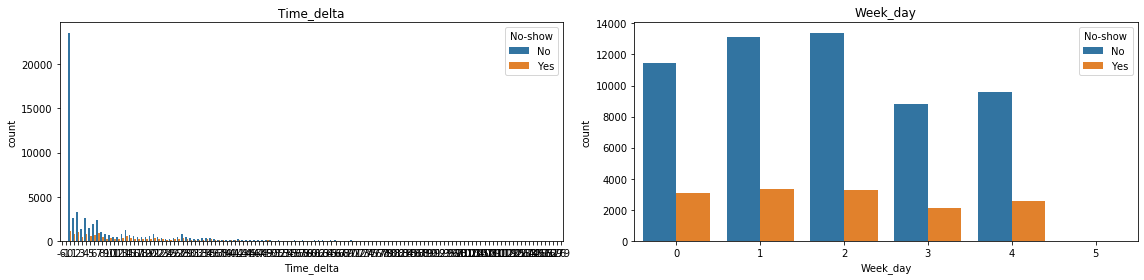

In [23]:
# Stampa dei grafici che mettono in relazione le colonne appena
# create con le persone che non si sono presentati alla visita

cols = ['Time_delta', 'Week_day']

n_rows = 1
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*4))
i=0
for r in range(n_rows):
    for c in range(n_cols):
        ax = axs[c]
        sns.countplot(train_data[cols[i]], hue=train_data['No-show'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='No-show', loc='upper right')
        i+=1
    
plt.tight_layout()

## Divisione dei dataset

Ora iniziamo a prepararci per l'addestramento del modello. Per prima cosa, dopo aver deciso le features su cui addestrare la rete, procediamo con la divisione del dataset in due parti: y che contiene solo la colonna delle label e X che conterrà tutto il resto.

In [24]:
# Scegliamo la colonna su cui si desidera addestrare la rete, ovvero
# la nostra 'label'
label = 'No-show'

# Scegliamo le colonne su cui NON voglimo addestrare il modello
not_features = ['AppointmentID', 'Gender', 'AppointmentDay', 'ScheduledDay']

In [25]:
# Dividiamo il train-set e il test-set in due parti così da poter addestrare la rete:
# y che contiene solo la colonna label 'No-show' che consiste nella soluzione al problema
# X che contiene tutte le altre colonne specificate in 'features'.
y_train = train_data.pop(label)
X_train = train_data.drop(not_features, axis=1)

y_test = test_data.pop(label)
X_test = test_data.drop(not_features, axis=1)

## Modello

La creazione del modello si divide in due fasi, una prima che si occuperà della fase di preprocessing dei dati del dataset e una seconda in cui verrà dichiarato il classificatore. Questi due verranno poi inseriti in una Pipeline.

### Preprocessing dei dati

Per prima cosa eseguiamo l'encoder della nostra colonna label ```y```.

In [26]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Poi procediamo con la creazione di una Pipelin che si occuperà di processare i dati in ingresso del dataset ```X```. Questa seconda parte è divisa in due Pipeline, una che si occupa di processare i dati numerici e una seconda che ineve farà l'encoder dei dati categorici.

In [27]:
# Definiamo le colonne che sono in forma numerica
numeric_features = list(X_train.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']))
not_numeric_features = list(X_train.columns[X_train.dtypes=='object'])

In [28]:
# Definiamo una Pipeline per la codifica dei valori Numerici
from sklearn.preprocessing import MinMaxScaler
numeric_transformer = Pipeline(
    steps=[('simple_imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [29]:
# Definiamo una Pipeline per la codifica dei valori NON Numerici
not_numeric_transformer = Pipeline(
    steps=[('simple_imputer', SimpleImputer(strategy='most_frequent')),
           ('one_hot', OneHotEncoder(handle_unknown='ignore'))])

Infine assembliamo le Pipeline fino ad ora create in un trasformer per colonne.

In [30]:
# Aggregazione delle pipeline di preprocessing dei dati.
preprocessor = ColumnTransformer(
    transformers=[('numeric_transformer', numeric_transformer, numeric_features),
                  ('not_numeric_transformer', not_numeric_transformer, not_numeric_features)])

### Dichiarazione del modello

Ora è il momento di includere nella Pipeline il classificatore che si occuperà dell'addestramento e della predizione dei dati.

In [31]:
# Creazione del modetto tramite una Pipeline. In essa sono sono
# spiegati l'ordine per il preprocessing e per il classificatore.
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

Il classificatore che è stato utilizzato prende il nome di ```RandomForestClassifier```. Questo algoritmo addestra un certo numero di alberi classificatori su delle piccole porzioni del dataset e ne calcola una media dei risultati per migliorare l'accuracy di predizione dei dati che seguiranno.

In [32]:
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_transformer',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['PatientId', 'Age',
                                                   'Scholarship',
                                                   'Hipertension', 'Diabetes',
                                                   'Alcoholism', 'Handcap',
                                                   'SMS_received', 'Time_delta',
                                                   'Week_day']),
                                                 ('not_numeric_transformer',
                           

## Addestramento

Una volta creato il modello si può procedere con l'addestramento sui dati di train.

In [33]:
# Addestramento del modello
model = model.fit(X_train, y_train)

In [34]:
# Calcolo dello score di addestramento del modello
score = model.score(X_train, y_train)

print(f"Training score: {score:.4%}")

Training score: 99.3285%


## Valutazione

Ora eseguiamo la valutazione del modello tramite la predizione dei valori di test.

In [35]:
# Predizione dei dati di test
prediction = model.predict(X_test)

In [36]:
# Calcolo dell'accuracy
acc = accuracy_score(y_test, prediction)

print(f"Prediction Accuracy: {acc:.4%}")

Prediction Accuracy: 78.8691%


In [37]:
# print(classification_report(y_test, prediction))

In [38]:
# Eseguiamo una breve stampa dei valori ottenuti tramite la predizione
cont_one = cont_zero = 0
for y_label, elem in zip(y_test, prediction):
    message = f"{y_label} {elem} "
    if not y_label==elem:
        message += "PREDIZIONE ERRATA"
    elif y_label==elem and elem==1:
        cont_one += 1
    else:
        cont_zero += 1
    print(message)
    
print()
print("Numero di 0 predetti: {} (di cui corretti: {}/{})\nNumero di 1 predetti: {} (di cui corretti: {}/{})".format((prediction==0).sum(),
                                                                                                                    cont_zero, 
                                                                                                                    (y_test==0).sum(), 
                                                                                                                    (prediction==1).sum(), 
                                                                                                                    cont_one, 
                                                                                                                    (y_test==1).sum()))

1 0 PREDIZIONE ERRATA
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
1 1 
0 0 
0 0 
1 0 PREDIZIONE ERRATA
1 0 PREDIZIONE ERRATA
0 0 
0 0 
1 0 PREDIZIONE ERRATA
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
1 0 PREDIZIONE ERRATA
0 0 
0 0 
0 0 
0 0 
0 0 
1 0 PREDIZIONE ERRATA
1 0 PREDIZIONE ERRATA
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
1 0 PREDIZIONE ERRATA
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
1 0 PREDIZIONE ERRATA
0 0 
0 0 
0 0 
1 0 PREDIZIONE ERRATA
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
1 0 PREDIZIONE ERRATA
1 0 PREDIZIONE ERRATA
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
1 0 PREDIZIONE ERRATA
0 0 
1 0 PREDIZIONE ERRATA
0 1 PREDIZIONE ERRATA
1 0 PREDIZIONE ERRATA
1 0 PREDIZIONE ERRATA
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
1 0 PREDIZIONE ERRATA
1 0 PREDIZIONE ERRATA
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
1 0 PREDIZIONE ERRATA
0 0 
1 0 PREDIZIONE ERRATA
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0 
0 0

## Confusion matrix

Stampiamo ora una confusion matrix con i valori trovati.

In [39]:
# Creazione di una confusion matrix
conf_matr = confusion_matrix(y_test, prediction, normalize=None)

In [40]:
# Stampa della confusion matrix
print(conf_matr)

[[13388   748]
 [ 2989   560]]
